# Introduction 

Testing some results here

### Methods

In [2]:
import time

import numpy as np

from scipy.stats import cauchy
from scipy.integrate import odeint

def rhs(z,t,J,K,n,nu,omega):
    
    x = z[:n]
    theta = z[n:]
    
    xd = x[:, np.newaxis] - x
    theta_d = theta[:, np.newaxis] - theta
    
    x_rhs = -J*np.nan_to_num(np.sin(xd)*np.cos(theta_d)) 
    theta_rhs = -K*np.nan_to_num(np.sin(theta_d)*np.cos(xd)) 
    
    x_next = np.nan_to_num( nu + (1/float(n))*np.sum((1-np.eye(xd.shape[0]))*x_rhs, axis=1))    
    theta_next = np.nan_to_num(omega +  (1/float(n))*np.sum((1-np.eye(xd.shape[0]))*theta_rhs, axis=1))
    
    return np.concatenate((x_next, theta_next))
    
    
def unpack(sols,n):
    """ I store the positions and phases of each swarmalator as a 3d vector z.
        Then the state vector for the systems is z[t][n]. This functions
        "unpacks" z[t][n] into x[t][n], y[t][n], theta[t][n]
    """

    T = len(sols)     #num timesteps
    x = np.array(np.zeros((T,n)))
    theta = np.array(np.zeros((T,n)))
    
    for t in range(T):
        x[t] = sols[t, 0:n]
        theta[t] = sols[t, n:2*n]
    
    return [x,theta]


def find_Ws(x,theta):
    """ Finds time series of order parameter W^+  = < e^{i*( phi_j + theta_j)} >_j -- see paper """
    numT, num_osc = x.shape
    W_plus = 1j*np.zeros(numT)
    W_minus = 1j*np.zeros(numT)
    for t in range(numT):
        W_plus[t] = np.sum(np.exp(1j*(x[t,:] + theta[t,:]))) / float(num_osc)
        W_minus[t] = np.sum(np.exp(1j*(x[t,:] - theta[t,:]))) / float(num_osc)
    return W_plus, W_minus


def S_sync(J,K,delta_v,delta_omega):
    delta_v, delta_omega = 1.0, 1.0
    delta_hat = (delta_v/J + delta_omega/K)
    return np.sqrt(1 - 2*delta_hat)

def S_phase_wave(J,K,delta_v,delta_omega):
    Jp = (J+K)/2.
    return np.sqrt(1 - 2*( delta_v + delta_omega) / Jp)


def scatter_t(x,theta,t):
    fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(np.mod(x[t,:],2*np.pi)-np.pi, np.mod(theta[t,:],2*np.pi)-np.pi)
    plt.xlim([-np.pi,np.pi])
    plt.ylim([-np.pi,np.pi])
    plt.xlabel('x', fontsize=14);
    plt.ylabel('theta', fontsize=14)

ModuleNotFoundError: No module named 'scipy'

### Do simulation

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


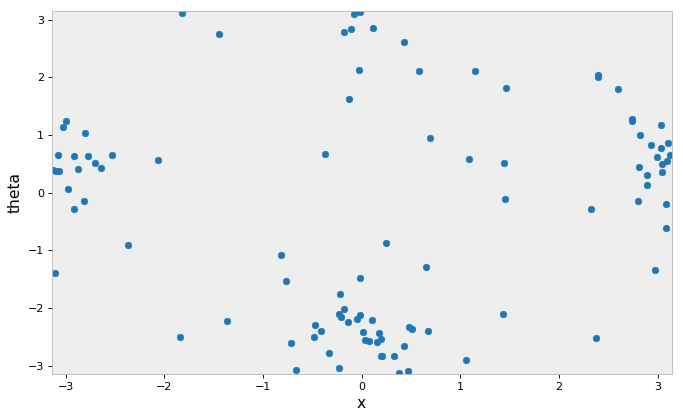

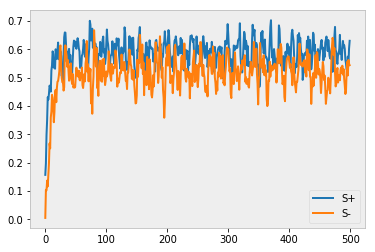

In [80]:
# Simulation parameters
dt, T, n  = 0.1, 50, 100   # surprisingly, dt = 0.5 seems to work OK (for prelimiart)
np.random.seed(0)
x0 = np.random.uniform(-np.pi,np.pi,n);
theta0 = np.random.uniform(-np.pi,np.pi,n)
t = [dt*i for i in range(int(T/dt))]

# Physical parameters
#nu, omega = np.zeros(n), np.zeros(n)
nu, omega = cauchy.rvs(size=n), cauchy.rvs(size=n)

J, K = 9.0, 5
z0 = [x0, theta0]

#Do simulation
tic = time.clock()
z0 = np.array([x0,theta0])
z0 = z0.flatten()
sols = odeint(rhs, z0, t, args=(J,K,n,nu,omega))
x, theta = unpack(sols,n)

# Plot
scatter_t(x,theta,-1)

plt.figure()
W_plus, W_minus = find_W_plus(x,theta)
plt.plot(np.abs(W_plus))
plt.plot(np.abs(W_minus))
plt.legend(["S+","S-"])

In [ ]:
### Interactive
from IPython.html.widgets import interact, interactive


def plot_temp(t):
    scatter_t(x,theta,t)
    
interact(plot_temp,t=(0,x.shape[0]-1,1))

### S(K) for sync state

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


K = -2.00 took 0.04 mins
K = 1.33 took 0.05 mins
K = 4.67 took 0.05 mins
K = 8.00 took 0.05 mins


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in sqrt


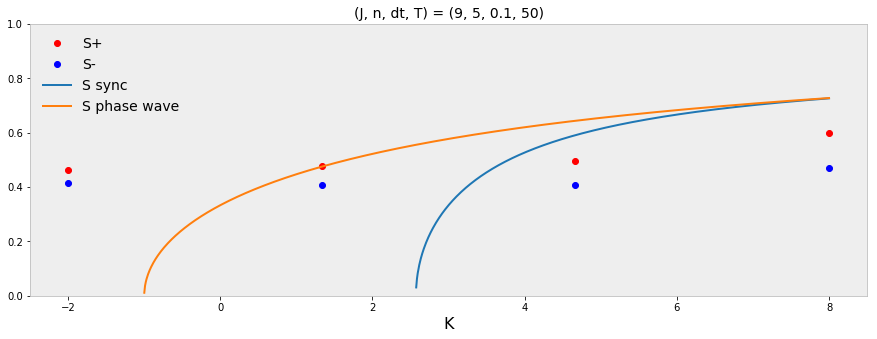

In [144]:
# Numerical parameters
dt, T, n  = 0.1, 50, 5 
np.random.seed(0)
x0 = np.random.uniform(-np.pi,np.pi,n);
theta0 = np.random.uniform(-np.pi,np.pi,n)
t = [dt*i for i in range(int(T/dt))]    
z0 = np.array([x0,theta0])
z0 = z0.flatten()

# Physical parameters
J, K = 9.0, -0.5
cutoff = int(0.8*T)
#nu, omega = np.zeros(n), np.zeros(n)
nu, omega = cauchy.rvs(size=n), cauchy.rvs(size=n)

Wp, Wm = [], []
Sp, Sm = [], []
Ks = np.linspace(-2,8,4)
for K in Ks:
    tic = time.clock()
    sols = odeint(rhs, z0, t, args=(J,K,n,nu,omega))
    x, theta = unpack(sols,n)
    W_plus, W_minus = find_Ws(x,theta)
    S_plus, S_minus = np.abs(W_plus), np.abs(W_minus)
    S_plus, S_minus = np.mean(S_plus[cutoff:-1]), np.mean(S_minus[cutoff:-1])
    if S_plus < S_minus:
        S_plus, S_minus = S_minus, S_plus
    Sp.append(S_plus); Sm.append(S_minus);
    Wp.append(W_plus); Wm.append(W_minus)
    toc = time.clock()
    tim = (toc-tic) / 60.0
    print(f'K = {K:.2f} took {tim:.2f} mins')
    
# Plot data
plt.figure(figsize=(15,5))
plt.plot(Ks,Sp,'ro');plt.plot(Ks,Sm,'bo')

# Plot theoretical curves
Ks1 = np.linspace(-2,8,1000)
J, delta_v, delta_omega = 9, 1, 1
Ss = [S_sync(J,K,delta_v,delta_omega) for K in Ks1]
Sph = [S_phase_wave(J,K,delta_v,delta_omega) for K in Ks1]
plt.plot(Ks1,Ss);plt.plot(Ks1,Sph)
plt.xlabel('K', fontsize=16);
plt.legend(["S+","S-",'S sync', 'S phase wave'], fontsize=14, frameon=False)
plt.ylim([0,1])
plt.title(f'(J, n, dt, T) = ({J}, {n}, {dt}, {T})', fontsize=14);

# Save data
fname = f'data/Wplus_versus_K_J_{J:.2f}_n_{n}.npy'
np.save(fname,Wp)

fname = f'data/Wminus_versus_K_J_{J:.2f}_n_{n}.npy'
np.save(fname,Wm)

fname = f'data/Ks_J_{J:.2f}_n_{n}.npy'
np.save(fname,Ks)

# Save figure
figname = f'figures/S_versus_K_J_{J:.2f}_n_{n}.png'
plt.savefig(figname)